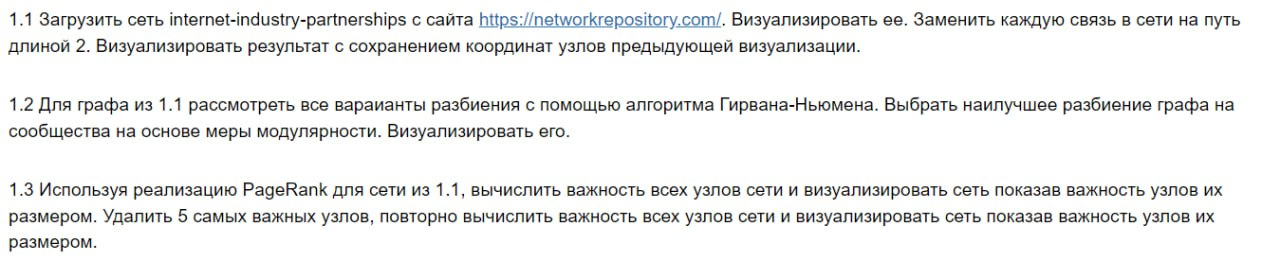

In [ ]:
import random

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

https://networkrepository.com/internet-industry-partnerships.php

# Задание №1

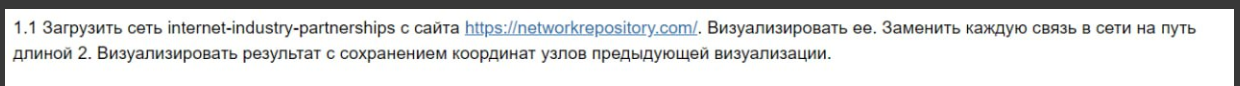

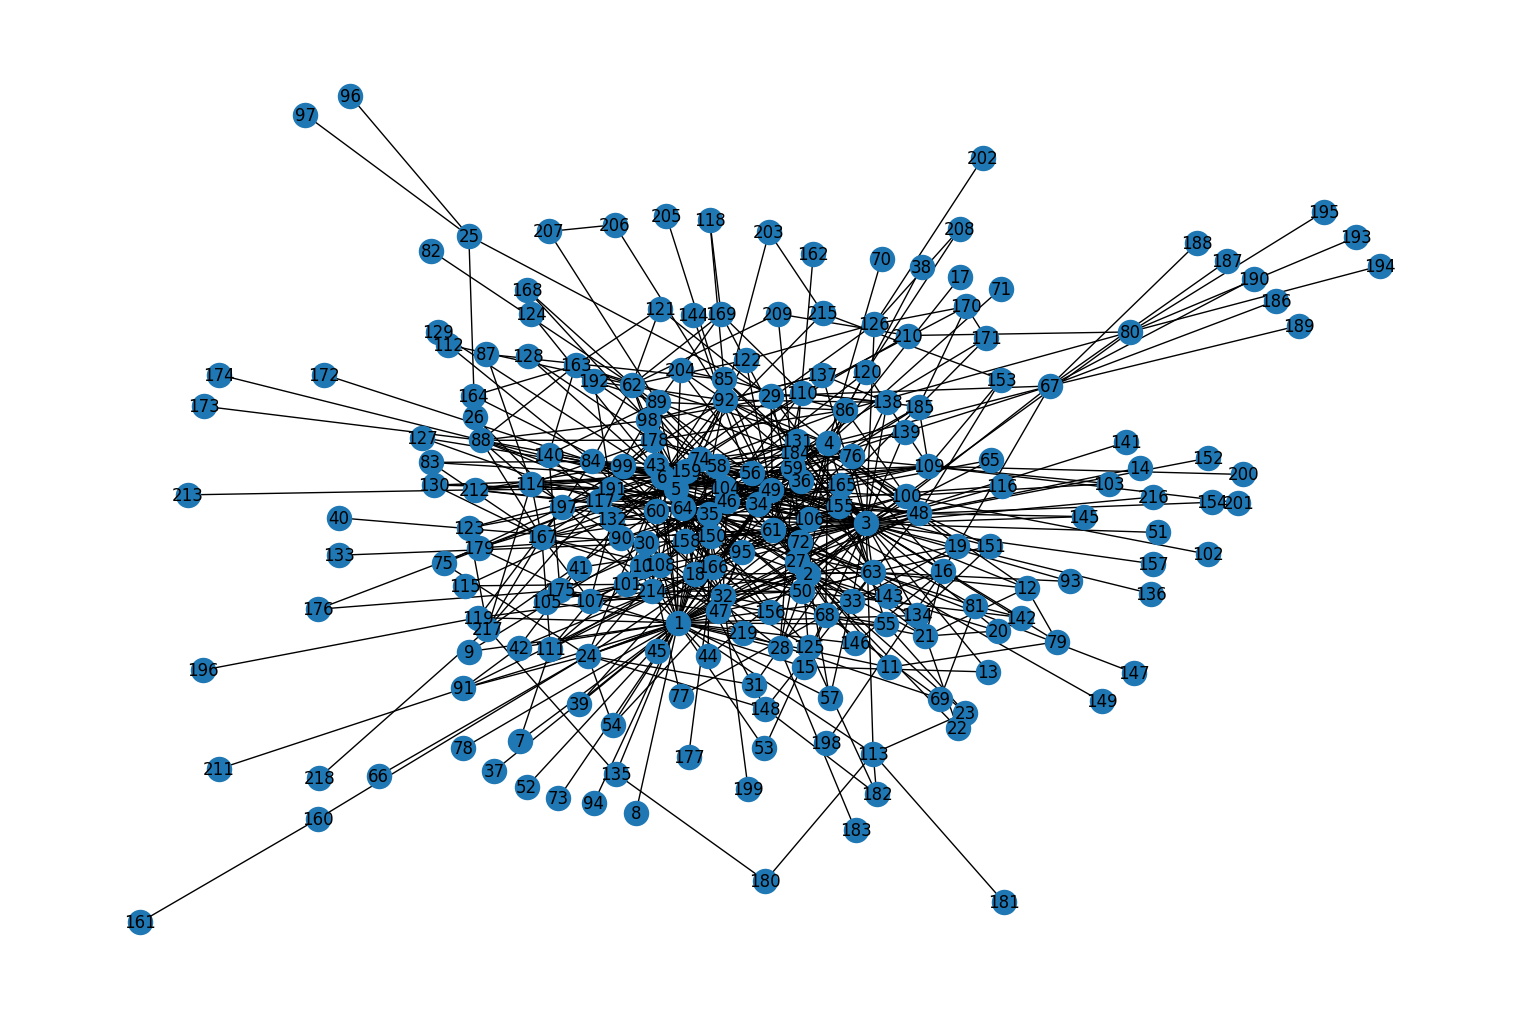

In [ ]:
G = nx.read_edgelist('internet-industry-partnerships.edges', delimiter=',')
pos = nx.spring_layout(G)
fig = plt.figure(figsize=(15, 10))
nx.draw(G,pos=pos, with_labels = True)

In [ ]:
G.number_of_edges(), G.number_of_nodes()

(630, 219)

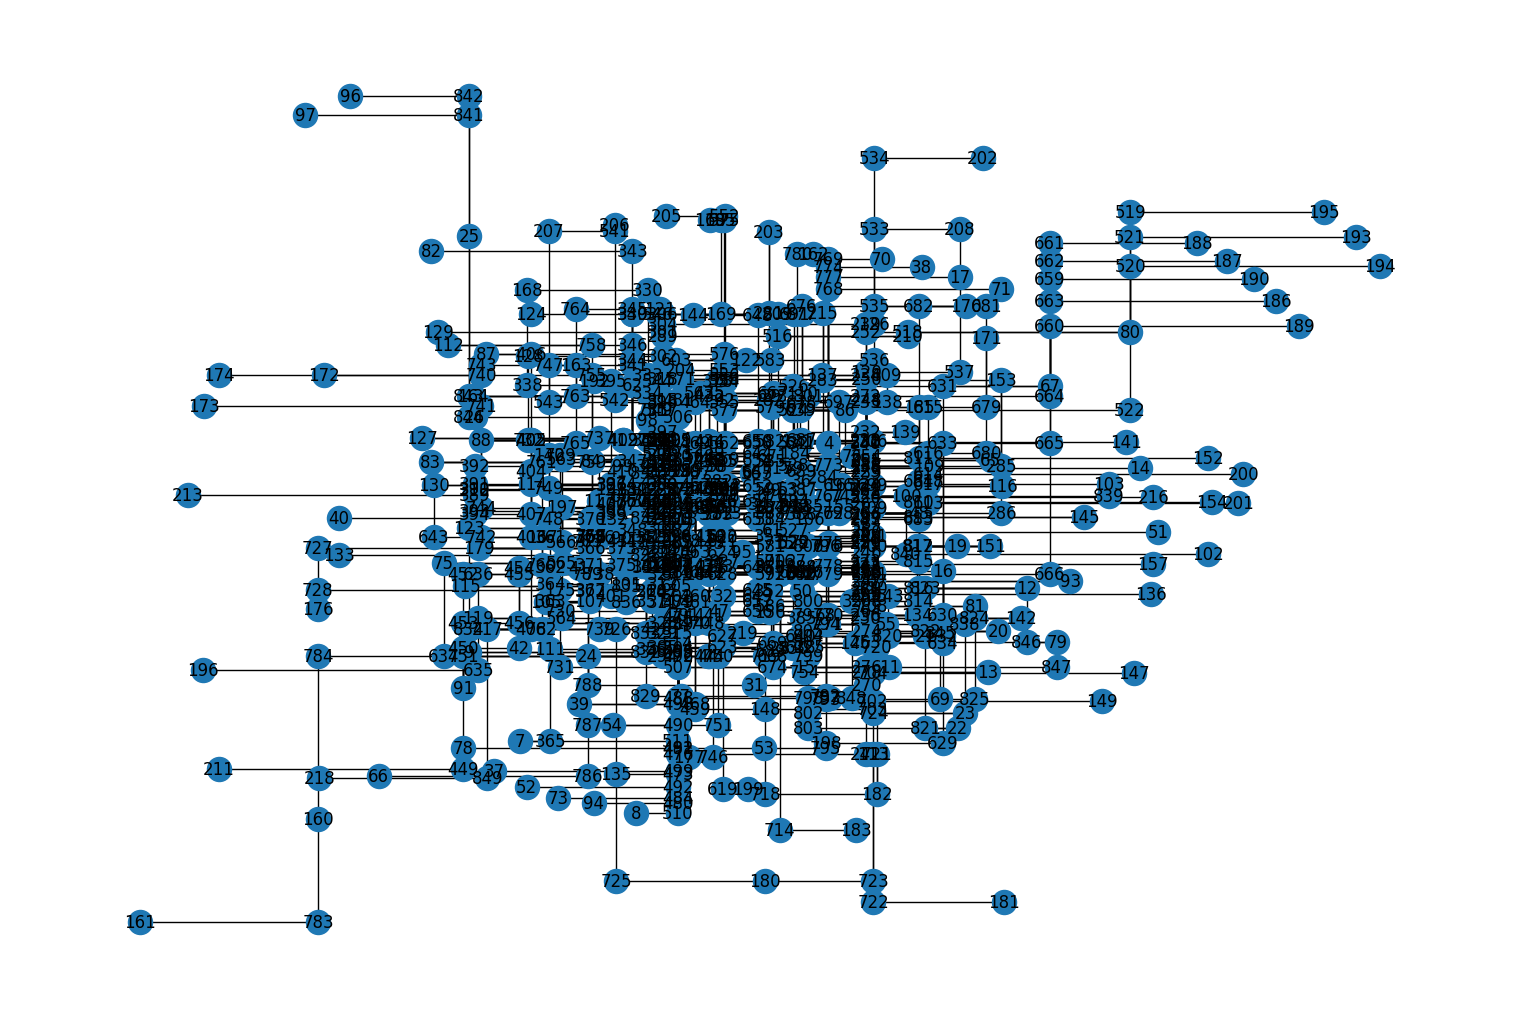

In [ ]:
edges_to_add = []
n_nodes = G.number_of_nodes()


for edge in G.edges:
    n_nodes += 1
    edges_to_add.append((edge[0], n_nodes))
    edges_to_add.append((n_nodes, edge[1]))
    pos[n_nodes] = [pos[edge[0]][0], pos[edge[1]][1]] # к имеющимуся списку pos добавляем новый узел с координатам x по первому узлу и координатами y по второму

G = nx.Graph()
G.add_edges_from(edges_to_add)


fig = plt.figure(figsize=(15, 10))
nx.draw(G, with_labels=True, pos = pos)

# Задание №2

In [ ]:
G = nx.Graph()

fh = open('internet-industry-partnerships.edges', "r")
ft = open("internet-industry-partnerships.node_labels", 'r')

#В этом цикле происходит чтение строк из файла 'internet-industry-partnerships.node_labels'.
#Каждая строка представляет метку узла. enumerate используется для получения индекса строки (idx) и значения метки (node_label).
#Метка преобразуется в целое число (int), а затем узел добавляется в граф G с индексом idx и атрибутом label, содержащим значение метки.
for idx, node_label in enumerate(ft.readlines(), 1):
    node_label = int(node_label)
    G.add_node(idx, label=node_label)

#В этом цикле происходит чтение строк из файла 'internet-industry-partnerships.edges'.
#Каждая строка представляет собой ребро между узлами, разделенные запятой.
#Строка разбивается на две части, преобразуется в пару целых чисел (int), и затем эта пара добавляется как ребро в граф G с помощью G.add_edge(*edge).
#Здесь *edge разворачивает пару чисел, чтобы передать их как два аргумента функции add_edge.
for edge in fh.readlines():
    edge = edge.split(",")
    edge = (int(edge[0]), int(edge[1]))
    G.add_edge(*edge)

print(G)

Graph with 219 nodes and 630 edges


In [ ]:
neighbors = list(G.neighbors(1))  # Получение списка соседних узлов
len(neighbors)

50

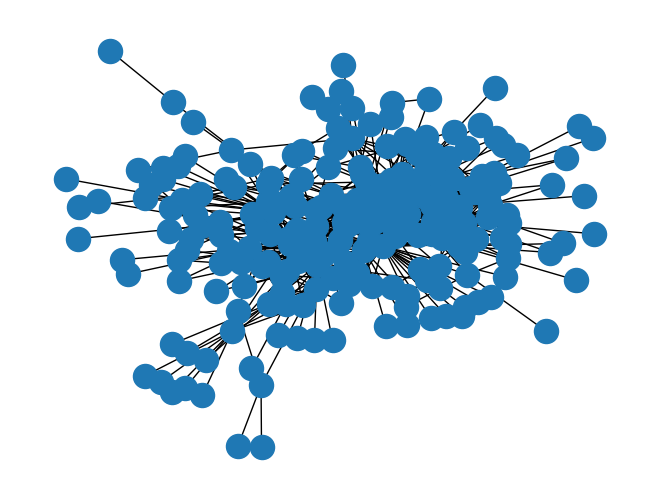

In [ ]:
nx.draw(G)

In [ ]:
comp = nx.community.girvan_newman(G)#Этот алгоритм возвращает итератор, который можно использовать для пошагового получения сообществ.
comp = list(comp)# Здесь итератор comp преобразуется в список.
#Это означает, что результаты алгоритма Гирвана-Ньюман теперь будут представлены в виде списка сообществ.
#Каждый элемент этого списка будет представлять собой одно сообщество, и список будет содержать все найденные сообщества в графе G.

In [ ]:
comp[0]

In [ ]:
#После выполнения этого кода, словарь idx будет содержать модулярности для каждого сообщества, найденного в графе G.
#Эти значения модулярности могут быть использованы для оценки качества разделения графа на сообщества и сравнения различных методов обнаружения сообществ.
idx = {}
for i, comm in enumerate(comp):#Здесь выполняется цикл по всем сообществам, найденным в графе и представленным в списке comp.
#Используется функция enumerate, чтобы получить итератор i (индекс) и comm (само сообщество) на каждой итерации.
    idx[i] = nx.community.modularity(G, comm)#Для каждого сообщества comm выполняется вычисление модулярности с использованием функции nx.community.modularity.
#Модулярность - это мера качества разделения графа на сообщества. Она оценивает, насколько хорошо разделение соответствует структуре графа, и выражается числом от -1 до 1.
#Значения модулярности ближе к 1 указывают на лучшее разделение. Результат модулярности для данного сообщества сохраняется в словаре idx с ключом i, где i - это индекс данного сообщества в списке comp.

In [ ]:
best_idx = -1
best_key = -1
for key, value in idx.items():#Здесь начинается цикл, который перебирает все элементы словаря idx. key - это индекс сообщества, а value - модулярность этого сообщества.
    if idx[key] > best_idx:
        best_idx = idx[key]
        best_key = key


In [ ]:
best_key, best_idx

(16, 0.33531997984378936)

In [ ]:
partition = comp[best_key]# наивысшая модулярность
partition#разбиение с наивышсей модулярностью

Этот код определяет функцию с именем generate_color_map, которая используется для генерации цветовой карты (color map) для узлов графа. Цветовая карта будет присваивать разные цвета узлам, находящимся в разных сообществах, и это помогает визуализировать структуру сообществ в графе.

In [ ]:
def generate_color_map(g, graph_communities): #Это определение функции generate_color_map.
#Она принимает два аргумента: g, который представляет граф, для которого нужно создать цветовую карту, и graph_communities, который представляет список сообществ в графе.
    n = len(graph_communities)
    colors = np.random.uniform(0, 1, size=(n,))#Создается массив случайных чисел с плавающей запятой в диапазоне от 0 до 1.
    #Этот массив будет содержать случайные значения цветов для каждого сообщества. size=(n,) указывает, что массив будет иметь длину, равную количеству сообществ.
    colors_array = np.ones(len(g), dtype='float')#Создается массив с единицами, который будет использоваться для хранения цветов узлов. Этот массив инициализируется значениями 1.0 (белый цвет), и его длина равна количеству узлов в графе g.
    for idx, community in enumerate(graph_communities):
        for node in community:
            colors_array[node-1] = colors[idx]#Для каждого узла в текущем сообществе устанавливается значение цвета в colors[idx],
            #где idx - это индекс текущего сообщества, а node - индекс узла. Индекс узла уменьшается на 1 (так как индексы в массивах обычно начинаются с 0, а индексы узлов в графе могут начинаться с 1 или другого значения).
    return np.array(colors_array)#Возвращается массив colors_array, который представляет цветовую карту для узлов графа. Каждый узел имеет свой цвет, соответствующий его принадлежности к определенному сообществу.

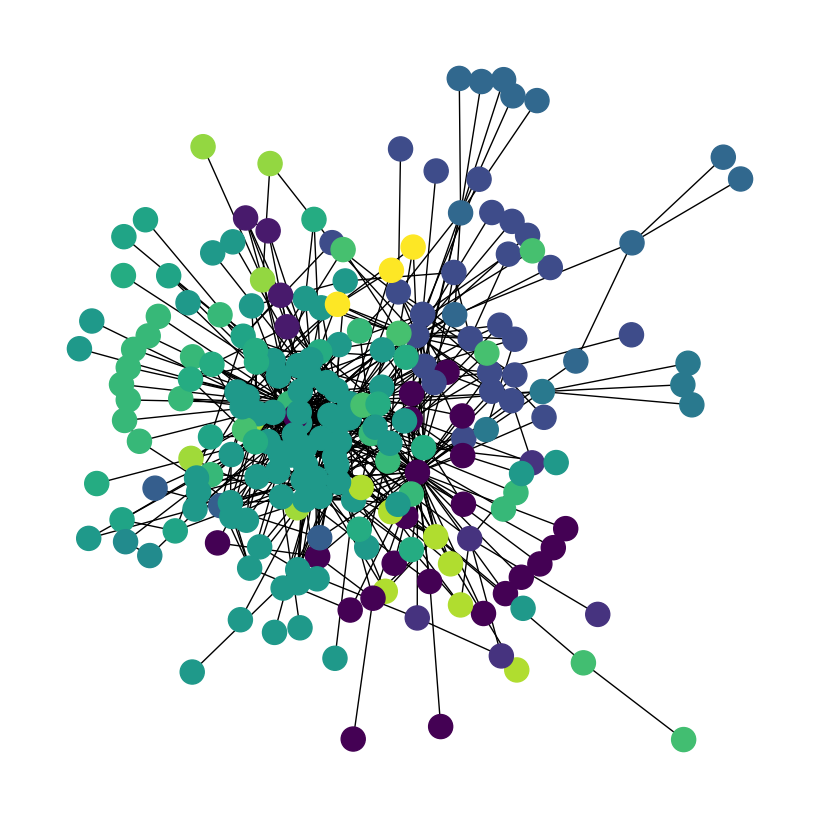

In [ ]:
color_map = generate_color_map(G, partition)
fig = plt.figure(figsize=(8, 8))
nx.draw(G, node_color=color_map)

# Задание №3

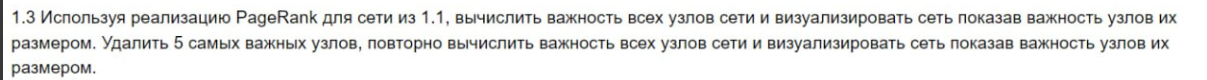

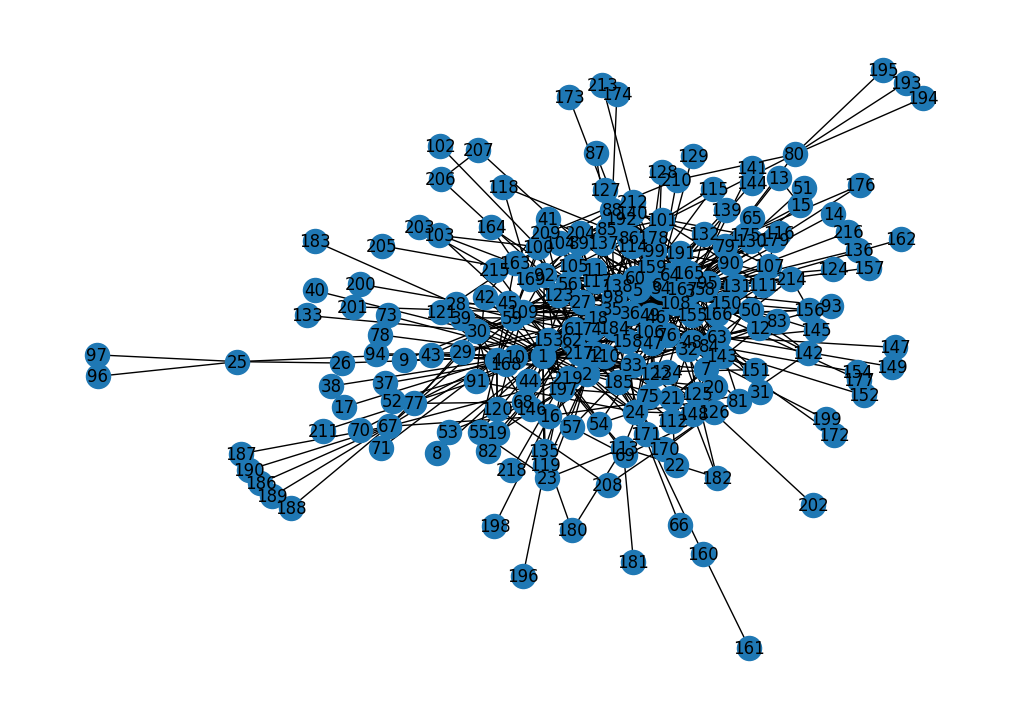

In [ ]:
G = nx.read_edgelist('internet-industry-partnerships.edges', delimiter=',')
pos = nx.spring_layout(G)
fig = plt.figure(figsize=(10, 7))
nx.draw(G, with_labels = True)

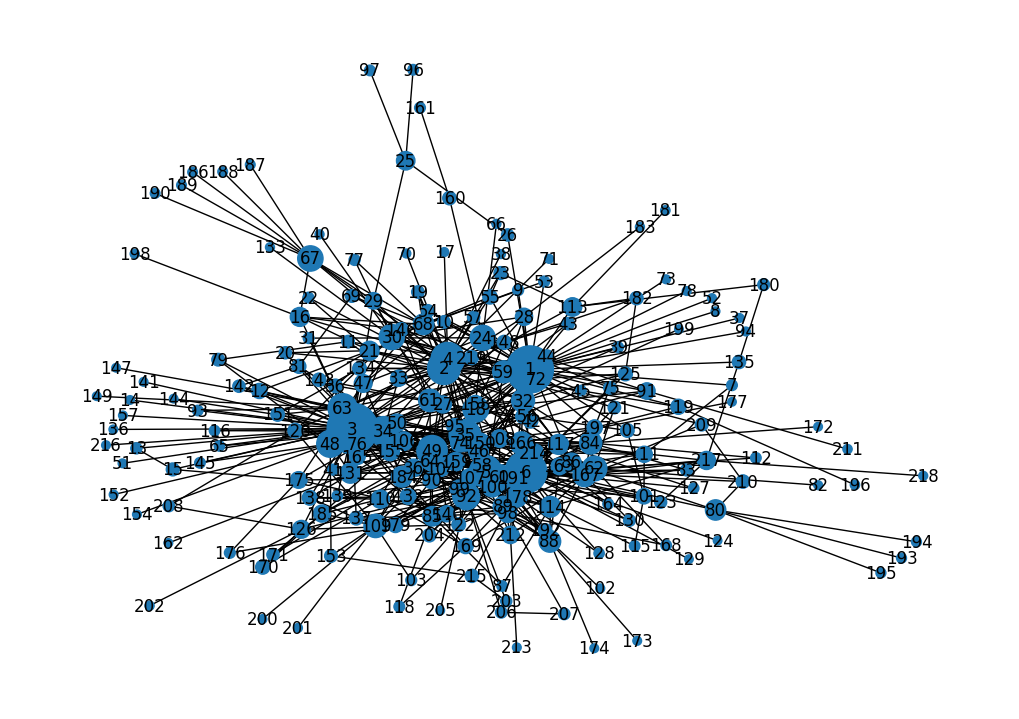

In [ ]:
pr = nx.pagerank(G)
pos = nx.spring_layout(G)
node_size = [30000*pr[node] for node in G.nodes()]
fig = plt.figure(figsize=(10, 7))
nx.draw(G,pos = pos, node_size = node_size, with_labels = True)

In [ ]:
pr

In [ ]:
b = sorted(pr, key = lambda x: -pr[x])[:5]
b

['3', '1', '6', '4', '2']

In [ ]:
b = sorted(pr, key = lambda x: pr[x])[-5:]
b

['2', '4', '6', '1', '3']

In [ ]:
G.remove_nodes_from(b)

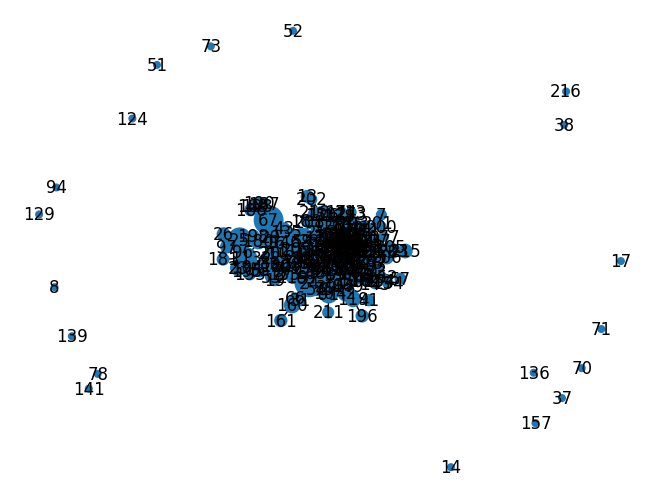

In [ ]:
pr = nx.pagerank(G)
pos = nx.spring_layout(G)
node_size = [30000*pr[node] for node in G.nodes()]
nx.draw(G,pos = pos, node_size = node_size, with_labels = True)

In [ ]:
largest = max(nx.connected_components(G),key = len)
G = G.subgraph(largest)

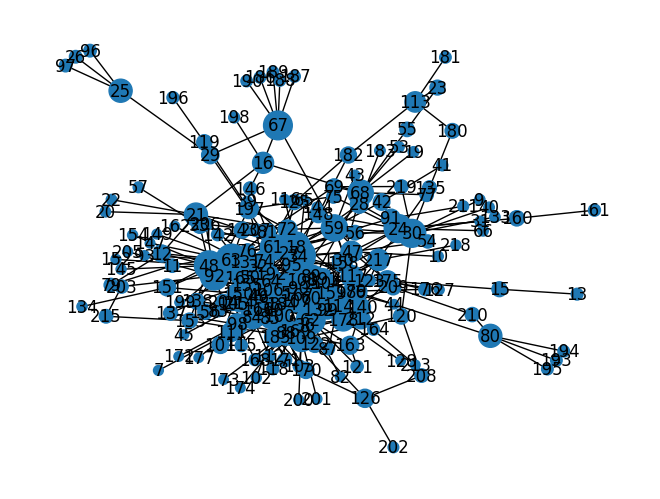

In [ ]:
pr = nx.pagerank(G)
pos = nx.spring_layout(G)
node_size = [30000*pr[node] for node in G.nodes()]
nx.draw(G,pos = pos, node_size = node_size, with_labels = True)